In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
import tensorflow as tf

In [12]:
df = pd.read_csv("data.csv")
df = df.rename(columns={"tension_strenght": "tensile_strength"})
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tensile_strength    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [14]:
for column in df.columns:
    print(str(column)+": "+str(df[column].unique()))
    print()

layer_height: [0.02 0.06 0.1  0.15 0.2 ]

wall_thickness: [ 8  7  1  4  6 10  5  9  2  3]

infill_density: [90 80 70 40 10 20 50 30 60]

infill_pattern: ['grid' 'honeycomb']

nozzle_temperature: [220 225 230 240 250 200 205 210 215]

bed_temperature: [60 65 70 75 80]

print_speed: [ 40  60 120]

material: ['abs' 'pla']

fan_speed: [  0  25  50  75 100]

roughness: [ 25  32  40  68  92  60  55  21  24  30  75 118 200 220 126 145  88  74
 120 144 265 312 368 180 176 128 138 121 168 154 225 289 326 192 212 172
 163 276 298 360 357 321 278 244]

tensile_strength: [18 16  8 10  5 24 12 14 27 25 37  9 23 26 33 29 19 11 34 13 22  4 35 28
 21 30]

elongation: [1.2 1.4 0.8 0.5 0.7 1.1 1.3 1.5 1.7 2.4 1.  2.2 1.9 1.6 2.1 2.  0.9 0.4
 1.8 2.9 0.6 2.8 2.3 3.3 3.1 2.7 3.2]



In [15]:
#In this data set, ABS and PLA assigned 0 and 1 values for materials (abs = 0, pla = 1)
df.material = [0 if each=='abs' else 1 for each in df.material]

#In this data set, grid and honeycomb assigned 0 and 1 values for infill_pattern (grid = 0, honeycomb = 1)
df.infill_pattern = [0 if each=='grid' else 1 for each in df.infill_pattern]

df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


In [16]:
df.layer_height = df.layer_height*100
df.elongation = df.elongation*100

In [17]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


In [18]:
output_drops = ['tensile_strength', 'roughness']
df = df.drop(output_drops, axis=1)

In [19]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,elongation
0,2.0,8,90,0,220,60,40,0,0,120.0
1,2.0,7,90,1,225,65,40,0,25,140.0
2,2.0,1,80,0,230,70,40,0,50,80.0
3,2.0,4,70,1,240,75,40,0,75,50.0
4,2.0,6,90,0,250,80,40,0,100,70.0


In [20]:
target_cols = ['elongation']
y = df[target_cols]
X = df.drop(target_cols,axis=1)

In [21]:
X = X.values
Y = y.values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.09)
print(X_train.shape)
print(Y_test.shape)

(45, 9)
(5, 1)


In [23]:
# Construct a NN model using functional API
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Activation, Flatten

inputvec = Input( shape=(9,) )
x = Dense( 16, activation='relu' )(inputvec)
x = Dense( 32, activation='relu' )(x)
x = Dense( 64, activation='relu' )(x)
#x = Dropout(0.5)(x)
x = Dense( 32, activation='relu' )(x)
x = Dense( 16, activation='relu' )(x)
x = Dense( 8, activation='relu' )(x)
#x = Dropout(0.25)(x)
preds = Dense(1, activation='linear' )(x)

model = Model(name= 'NN_model_2_2', inputs = inputvec,outputs=preds)
model.summary()

Model: "NN_model_2_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                

In [24]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Epoch 1/1000
9/9 [==============================] - 0s 1ms/step - loss: 28838.3574 - accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 2ms/step - loss: 25637.0918 - accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 2ms/step - loss: 20078.3809 - accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 2ms/step - loss: 13044.2676 - accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 1ms/step - loss: 6449.2568 - accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 2ms/step - loss: 7070.1797 - accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 1ms/step - loss: 5796.6797 - accuracy: 0.0000e+00
Epoch 8/1000
9/9 [==============================] - 0s 1ms/step - loss: 5773.9551 - accuracy: 0.0000e+00
Epoch 9/1000
9/9 [==============================] - 0s 2ms/step - loss: 5538.7183 - accuracy: 0.0000e+00
Epoch 10/1000
9/9 [==============================] 

9/9 [==============================] - 0s 1ms/step - loss: 1639.1907 - accuracy: 0.0000e+00
Epoch 79/1000
9/9 [==============================] - 0s 1ms/step - loss: 1810.9507 - accuracy: 0.0000e+00
Epoch 80/1000
9/9 [==============================] - 0s 1ms/step - loss: 2016.2904 - accuracy: 0.0000e+00
Epoch 81/1000
9/9 [==============================] - 0s 1ms/step - loss: 1626.1699 - accuracy: 0.0000e+00
Epoch 82/1000
9/9 [==============================] - 0s 1ms/step - loss: 1621.1011 - accuracy: 0.0000e+00
Epoch 83/1000
9/9 [==============================] - 0s 1ms/step - loss: 1755.0699 - accuracy: 0.0000e+00
Epoch 84/1000
9/9 [==============================] - 0s 1ms/step - loss: 1455.5934 - accuracy: 0.0000e+00
Epoch 85/1000
9/9 [==============================] - 0s 1ms/step - loss: 1376.0771 - accuracy: 0.0000e+00
Epoch 86/1000
9/9 [==============================] - 0s 1ms/step - loss: 1491.1757 - accuracy: 0.0000e+00
Epoch 87/1000
9/9 [==============================] - 0s 1ms/

9/9 [==============================] - 0s 1ms/step - loss: 767.8339 - accuracy: 0.0000e+00
Epoch 156/1000
9/9 [==============================] - 0s 1ms/step - loss: 844.6282 - accuracy: 0.0000e+00
Epoch 157/1000
9/9 [==============================] - 0s 1ms/step - loss: 993.9515 - accuracy: 0.0000e+00
Epoch 158/1000
9/9 [==============================] - 0s 1ms/step - loss: 808.7380 - accuracy: 0.0000e+00
Epoch 159/1000
9/9 [==============================] - 0s 1ms/step - loss: 590.0555 - accuracy: 0.0000e+00
Epoch 160/1000
9/9 [==============================] - 0s 1ms/step - loss: 561.3068 - accuracy: 0.0000e+00
Epoch 161/1000
9/9 [==============================] - 0s 1ms/step - loss: 580.9023 - accuracy: 0.0000e+00
Epoch 162/1000
9/9 [==============================] - 0s 1ms/step - loss: 658.2882 - accuracy: 0.0000e+00
Epoch 163/1000
9/9 [==============================] - 0s 1ms/step - loss: 535.4210 - accuracy: 0.0000e+00
Epoch 164/1000
9/9 [==============================] - 0s 1ms/

9/9 [==============================] - 0s 1ms/step - loss: 132.5340 - accuracy: 0.0000e+00
Epoch 233/1000
9/9 [==============================] - 0s 1ms/step - loss: 155.5451 - accuracy: 0.0000e+00
Epoch 234/1000
9/9 [==============================] - 0s 1ms/step - loss: 195.2572 - accuracy: 0.0000e+00
Epoch 235/1000
9/9 [==============================] - 0s 1ms/step - loss: 196.8747 - accuracy: 0.0000e+00
Epoch 236/1000
9/9 [==============================] - 0s 1ms/step - loss: 150.6544 - accuracy: 0.0000e+00
Epoch 237/1000
9/9 [==============================] - 0s 1ms/step - loss: 110.8290 - accuracy: 0.0000e+00
Epoch 238/1000
9/9 [==============================] - 0s 1ms/step - loss: 147.1449 - accuracy: 0.0000e+00
Epoch 239/1000
9/9 [==============================] - 0s 1ms/step - loss: 132.9186 - accuracy: 0.0000e+00
Epoch 240/1000
9/9 [==============================] - 0s 2ms/step - loss: 112.7655 - accuracy: 0.0000e+00
Epoch 241/1000
9/9 [==============================] - 0s 1ms/

9/9 [==============================] - 0s 1ms/step - loss: 14.1974 - accuracy: 0.0000e+00
Epoch 310/1000
9/9 [==============================] - 0s 1ms/step - loss: 16.7793 - accuracy: 0.0000e+00
Epoch 311/1000
9/9 [==============================] - 0s 1ms/step - loss: 14.6999 - accuracy: 0.0000e+00
Epoch 312/1000
9/9 [==============================] - 0s 2ms/step - loss: 17.3761 - accuracy: 0.0000e+00
Epoch 313/1000
9/9 [==============================] - 0s 1ms/step - loss: 19.5004 - accuracy: 0.0000e+00
Epoch 314/1000
9/9 [==============================] - 0s 1ms/step - loss: 17.7184 - accuracy: 0.0000e+00
Epoch 315/1000
9/9 [==============================] - 0s 1ms/step - loss: 17.7424 - accuracy: 0.0000e+00
Epoch 316/1000
9/9 [==============================] - 0s 1ms/step - loss: 19.9998 - accuracy: 0.0000e+00
Epoch 317/1000
9/9 [==============================] - 0s 1ms/step - loss: 18.7337 - accuracy: 0.0000e+00
Epoch 318/1000
9/9 [==============================] - 0s 1ms/step - lo

9/9 [==============================] - 0s 1ms/step - loss: 17.7017 - accuracy: 0.0000e+00
Epoch 388/1000
9/9 [==============================] - 0s 1ms/step - loss: 11.2961 - accuracy: 0.0000e+00
Epoch 389/1000
9/9 [==============================] - 0s 1ms/step - loss: 10.4862 - accuracy: 0.0000e+00
Epoch 390/1000
9/9 [==============================] - 0s 1ms/step - loss: 12.7324 - accuracy: 0.0000e+00
Epoch 391/1000
9/9 [==============================] - 0s 1ms/step - loss: 29.8681 - accuracy: 0.0000e+00
Epoch 392/1000
9/9 [==============================] - 0s 1ms/step - loss: 42.1261 - accuracy: 0.0000e+00
Epoch 393/1000
9/9 [==============================] - 0s 1ms/step - loss: 52.5658 - accuracy: 0.0000e+00
Epoch 394/1000
9/9 [==============================] - 0s 1ms/step - loss: 56.9522 - accuracy: 0.0000e+00
Epoch 395/1000
9/9 [==============================] - 0s 1ms/step - loss: 55.3528 - accuracy: 0.0000e+00
Epoch 396/1000
9/9 [==============================] - 0s 1ms/step - lo

9/9 [==============================] - 0s 1ms/step - loss: 21.0565 - accuracy: 0.0000e+00
Epoch 466/1000
9/9 [==============================] - 0s 1ms/step - loss: 12.5537 - accuracy: 0.0000e+00
Epoch 467/1000
9/9 [==============================] - 0s 1ms/step - loss: 11.0150 - accuracy: 0.0000e+00
Epoch 468/1000
9/9 [==============================] - 0s 1ms/step - loss: 7.3407 - accuracy: 0.0000e+00
Epoch 469/1000
9/9 [==============================] - 0s 1ms/step - loss: 5.1125 - accuracy: 0.0000e+00
Epoch 470/1000
9/9 [==============================] - 0s 1ms/step - loss: 9.0476 - accuracy: 0.0000e+00
Epoch 471/1000
9/9 [==============================] - 0s 1ms/step - loss: 11.6315 - accuracy: 0.0000e+00
Epoch 472/1000
9/9 [==============================] - 0s 1ms/step - loss: 25.7861 - accuracy: 0.0000e+00
Epoch 473/1000
9/9 [==============================] - 0s 1ms/step - loss: 24.8824 - accuracy: 0.0000e+00
Epoch 474/1000
9/9 [==============================] - 0s 1ms/step - loss:

9/9 [==============================] - 0s 2ms/step - loss: 5.4280 - accuracy: 0.0000e+00
Epoch 544/1000
9/9 [==============================] - 0s 1ms/step - loss: 6.8486 - accuracy: 0.0000e+00
Epoch 545/1000
9/9 [==============================] - 0s 1ms/step - loss: 4.2397 - accuracy: 0.0000e+00
Epoch 546/1000
9/9 [==============================] - 0s 1ms/step - loss: 4.6980 - accuracy: 0.0000e+00
Epoch 547/1000
9/9 [==============================] - 0s 1ms/step - loss: 5.8683 - accuracy: 0.0000e+00
Epoch 548/1000
9/9 [==============================] - 0s 1ms/step - loss: 7.7877 - accuracy: 0.0000e+00
Epoch 549/1000
9/9 [==============================] - 0s 1ms/step - loss: 7.1924 - accuracy: 0.0000e+00
Epoch 550/1000
9/9 [==============================] - 0s 1ms/step - loss: 5.5367 - accuracy: 0.0000e+00
Epoch 551/1000
9/9 [==============================] - 0s 1ms/step - loss: 9.7849 - accuracy: 0.0000e+00
Epoch 552/1000
9/9 [==============================] - 0s 1ms/step - loss: 7.031

9/9 [==============================] - 0s 1ms/step - loss: 8.0513 - accuracy: 0.0000e+00
Epoch 622/1000
9/9 [==============================] - 0s 1ms/step - loss: 9.4970 - accuracy: 0.0000e+00
Epoch 623/1000
9/9 [==============================] - 0s 1ms/step - loss: 10.6475 - accuracy: 0.0000e+00
Epoch 624/1000
9/9 [==============================] - 0s 1ms/step - loss: 8.5124 - accuracy: 0.0000e+00
Epoch 625/1000
9/9 [==============================] - 0s 1ms/step - loss: 13.7498 - accuracy: 0.0000e+00
Epoch 626/1000
9/9 [==============================] - 0s 1ms/step - loss: 33.5378 - accuracy: 0.0000e+00
Epoch 627/1000
9/9 [==============================] - 0s 1ms/step - loss: 46.0483 - accuracy: 0.0000e+00
Epoch 628/1000
9/9 [==============================] - 0s 2ms/step - loss: 23.8306 - accuracy: 0.0000e+00
Epoch 629/1000
9/9 [==============================] - 0s 2ms/step - loss: 9.7278 - accuracy: 0.0000e+00
Epoch 630/1000
9/9 [==============================] - 0s 2ms/step - loss: 

9/9 [==============================] - 0s 1ms/step - loss: 32.7794 - accuracy: 0.0000e+00
Epoch 700/1000
9/9 [==============================] - 0s 1ms/step - loss: 68.3752 - accuracy: 0.0000e+00
Epoch 701/1000
9/9 [==============================] - 0s 1ms/step - loss: 39.4968 - accuracy: 0.0000e+00
Epoch 702/1000
9/9 [==============================] - 0s 1ms/step - loss: 31.0345 - accuracy: 0.0000e+00
Epoch 703/1000
9/9 [==============================] - 0s 997us/step - loss: 19.8808 - accuracy: 0.0000e+00
Epoch 704/1000
9/9 [==============================] - 0s 1ms/step - loss: 10.1288 - accuracy: 0.0000e+00
Epoch 705/1000
9/9 [==============================] - 0s 1ms/step - loss: 10.6235 - accuracy: 0.0000e+00
Epoch 706/1000
9/9 [==============================] - 0s 1ms/step - loss: 5.1885 - accuracy: 0.0000e+00
Epoch 707/1000
9/9 [==============================] - 0s 1ms/step - loss: 5.2290 - accuracy: 0.0000e+00
Epoch 708/1000
9/9 [==============================] - 0s 1ms/step - lo

9/9 [==============================] - 0s 1ms/step - loss: 6.6667 - accuracy: 0.0000e+00
Epoch 778/1000
9/9 [==============================] - 0s 1ms/step - loss: 6.4708 - accuracy: 0.0000e+00
Epoch 779/1000
9/9 [==============================] - 0s 1ms/step - loss: 10.0876 - accuracy: 0.0000e+00
Epoch 780/1000
9/9 [==============================] - 0s 1ms/step - loss: 25.1643 - accuracy: 0.0000e+00
Epoch 781/1000
9/9 [==============================] - 0s 1ms/step - loss: 23.8035 - accuracy: 0.0000e+00
Epoch 782/1000
9/9 [==============================] - 0s 1ms/step - loss: 43.7450 - accuracy: 0.0000e+00
Epoch 783/1000
9/9 [==============================] - 0s 1ms/step - loss: 44.5321 - accuracy: 0.0000e+00
Epoch 784/1000
9/9 [==============================] - 0s 1ms/step - loss: 44.6532 - accuracy: 0.0000e+00
Epoch 785/1000
9/9 [==============================] - 0s 1ms/step - loss: 67.7883 - accuracy: 0.0000e+00
Epoch 786/1000
9/9 [==============================] - 0s 1ms/step - loss

9/9 [==============================] - 0s 2ms/step - loss: 19.9333 - accuracy: 0.0000e+00
Epoch 856/1000
9/9 [==============================] - 0s 1ms/step - loss: 17.7155 - accuracy: 0.0000e+00
Epoch 857/1000
9/9 [==============================] - 0s 1ms/step - loss: 34.9561 - accuracy: 0.0000e+00
Epoch 858/1000
9/9 [==============================] - 0s 1ms/step - loss: 24.3069 - accuracy: 0.0000e+00
Epoch 859/1000
9/9 [==============================] - 0s 1ms/step - loss: 17.8214 - accuracy: 0.0000e+00
Epoch 860/1000
9/9 [==============================] - 0s 1ms/step - loss: 36.0219 - accuracy: 0.0000e+00
Epoch 861/1000
9/9 [==============================] - 0s 1ms/step - loss: 22.3607 - accuracy: 0.0000e+00
Epoch 862/1000
9/9 [==============================] - 0s 1ms/step - loss: 32.5263 - accuracy: 0.0000e+00
Epoch 863/1000
9/9 [==============================] - 0s 1ms/step - loss: 68.3227 - accuracy: 0.0000e+00
Epoch 864/1000
9/9 [==============================] - 0s 1ms/step - lo

9/9 [==============================] - 0s 1ms/step - loss: 124.8716 - accuracy: 0.0000e+00
Epoch 934/1000
9/9 [==============================] - 0s 1ms/step - loss: 144.2469 - accuracy: 0.0000e+00
Epoch 935/1000
9/9 [==============================] - 0s 1ms/step - loss: 72.2889 - accuracy: 0.0000e+00
Epoch 936/1000
9/9 [==============================] - 0s 1ms/step - loss: 137.5386 - accuracy: 0.0000e+00
Epoch 937/1000
9/9 [==============================] - 0s 1ms/step - loss: 146.0384 - accuracy: 0.0000e+00
Epoch 938/1000
9/9 [==============================] - 0s 1ms/step - loss: 79.4154 - accuracy: 0.0000e+00
Epoch 939/1000
9/9 [==============================] - 0s 1ms/step - loss: 27.8563 - accuracy: 0.0000e+00
Epoch 940/1000
9/9 [==============================] - 0s 1ms/step - loss: 29.1309 - accuracy: 0.0000e+00
Epoch 941/1000
9/9 [==============================] - 0s 1ms/step - loss: 21.9998 - accuracy: 0.0000e+00
Epoch 942/1000
9/9 [==============================] - 0s 1ms/step 

Text(0, 0.5, 'mean squared error')

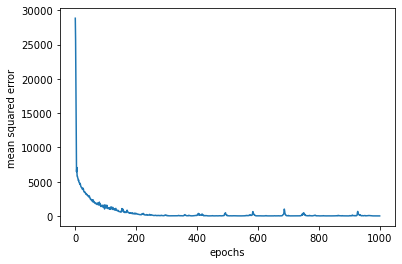

In [25]:
# Fit model to the data (train the model)
from keras.callbacks import History
history = History()

model.fit(X_train, Y_train, batch_size=5, epochs=1000, verbose=1, callbacks=[history])
# Batch size = 50 (all samples), epoch number = 10000 (the learning algorithm works through the entire dataset for 10000 times)
print('Done!')

# Plot the loss history
plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("mean squared error")

Text(0, 0.5, 'mean squared error')

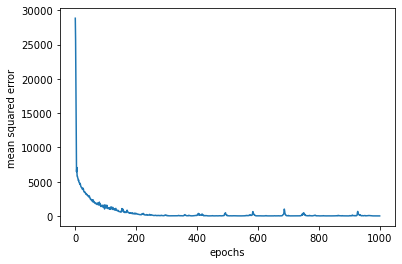

In [26]:
plt.plot(history.history['loss'],)
plt.xlabel("epochs")
plt.ylabel("mean squared error")

1/1 [==============================] - 0s 119ms/step - loss: 4105.8447 - accuracy: 0.0000e+00
[4105.8447265625, 0.0]


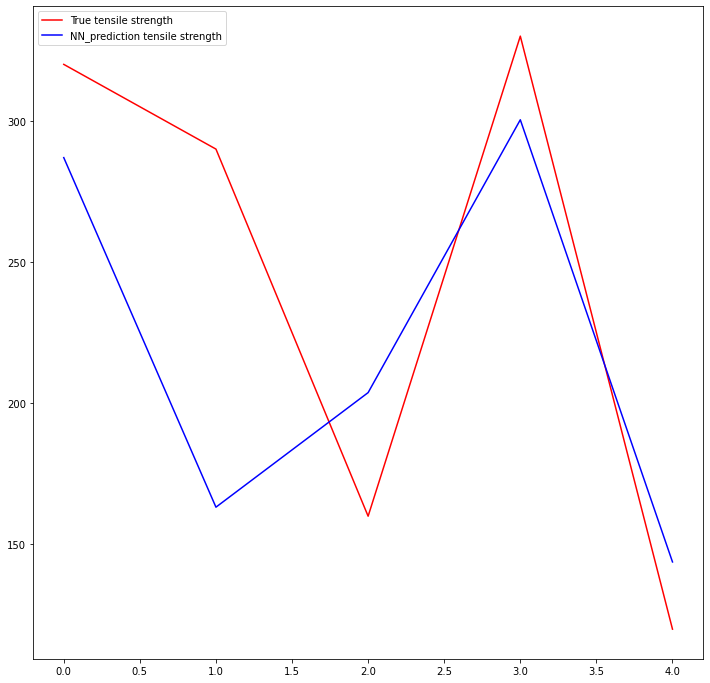

In [27]:
# Evaluate the accuracy of the model (loss: mean squared error, as defined in the step of compiling)
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

# Batch prediction & plot
Y_pred = model.predict(X_test)


plt.show()
plt.figure(figsize=(12, 12))
line1, = plt.plot(Y_test[:,0],'r-')
line2, = plt.plot(Y_pred[:,0],'b-')
#line3, = plt.plot(Y_test[:,1],'r--')
#line4, = plt.plot(Y_pred[:,1],'b--')
#line5, = plt.plot(Y_test[:,2],'r:')
#line6, = plt.plot(Y_pred[:,2],'b:')
plt.legend([line1, line2], ['True tensile strength', 'NN_prediction tensile strength', 'True roughness', 'NN_prediction roughness', 'True elongation', 'NN_prediction elongation'])